## Identifying Shifts in Mental Health Discourse across COVID periods

In [1]:
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/beherya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Text Preprocessing Function

In [2]:
def preprocess_text(text):
    if pd.isna(text):
        return []

    text = text.lower()

    text = re.sub(r"http\S+|www.\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    stopwords_set = set(stopwords.words("english"))

    custom_stop_words = [
        "like",
        "dont",
        "get",
        "ive",
        "want",
        "even",
        "really",
        "things",
        "something",
        "get",
        "thing",
        "year",
        "years",
        "much",
        "cant",
        "would",
        "much",
        "back",
        "also"
    ]

    stopwords_set.update(custom_stop_words)

    words = text.split()
    words = [word for word in words if len(word) > 2 and word not in stopwords_set]

    return words


print("Done")

Done


This function cleans text by converting to lowercase, removing URLs and punctuation, and filtering out stopwords (both standard English and custom ones). It only keeps words longer than 2 characters. The custom stopwords are conversational filler words that don't add analytical value.

In [3]:
# Get word frequency by period

def get_words_by_period(df, text_column="full_text"):
    period_word_counts = {}
    
    for period in df["covid_period"].unique():
        period_data = df[df["covid_period"] == period]
        
        all_words = []
        for text in period_data[text_column]:
            all_words.extend(preprocess_text(text))
            
        word_counts = Counter(all_words)
        period_word_counts[period] = word_counts
        
    return period_word_counts

This function iterates through each COVID period, preprocesses all text from that period, and uses Counter to tally word frequencies. It returns a dictionary where keys are period names and values are word count dictionaries.

In [4]:
%store -r reddit_sent_df

In [5]:

period_word_counts = get_words_by_period(reddit_sent_df)

In [6]:
def get_top_words(word_counts, n=20):
    return word_counts.most_common(n)

In [7]:
print("Top 10 words by COVID Period")
for period in ["Pre-COVID", "During COVID", "Post-COVID"]:
    if period in period_word_counts:
        print(f"\n{period}:")
        top_words = get_top_words(period_word_counts[period], 10)
        for word, count in top_words:
            print(f"\t{word}:\t{count}")

Top 10 words by COVID Period

Pre-COVID:
	feel:	348
	know:	250
	anxiety:	243
	time:	206
	life:	189
	people:	180
	new:	161
	help:	155
	going:	146
	friends:	130

During COVID:
	feel:	7192
	know:	5042
	anxiety:	4401
	life:	3607
	time:	3601
	people:	3105
	one:	2737
	think:	2669
	help:	2641
	going:	2479

Post-COVID:
	feel:	5665
	know:	3855
	anxiety:	3813
	life:	3028
	time:	2760
	people:	2221
	think:	2064
	going:	2039
	one:	1999
	help:	1886


**Interpretation**:
The raw frequencies tell a striking story:

Scaling Effect: The word "feel" appears 348 times pre-COVID but jumps to 7,192 during COVID—a 20.7x increase. This reflects both the volume increase (18x more posts) and a slight intensification of emotional expression.

Consistency Across Periods: The top 10 words are remarkably similar across all three periods. "Feel," "know," "anxiety," "life," "time," "people," and "help" dominate all three lists, suggesting these are core themes in mental health discussions regardless of external circumstances.

**Proportional Analysis**:
Pre-COVID: "anxiety" appears 243 times (0.70 times per post on average)

During COVID: "anxiety" appears 4,401 times (0.42 times per post)

Post-COVID: "anxiety" appears 3,813 times (0.61 times per post)


Interestingly, "anxiety" was mentioned proportionally less per post during COVID, possibly because discussions became more varied (including topics like isolation, work, school) rather than purely anxiety-focused.

New Words: "One" and "think" enter the top 10 during and after COVID, suggesting more reflective, cognitive language emerged during the pandemic.


In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
wordcloud_pre_covid = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis",
    max_words=100
).generate_from_frequencies(period_word_counts["Pre-COVID"])

wordcloud_during_covid = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis",
    max_words=100
).generate_from_frequencies(period_word_counts["During COVID"])

wordcloud_post_covid = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis",
    max_words=100
).generate_from_frequencies(period_word_counts["Post-COVID"])

This creates visual word clouds where word size corresponds to frequency. The viridis colormap provides a gradient from purple to yellow, and max_words=100 limits the display to the 100 most frequent words.

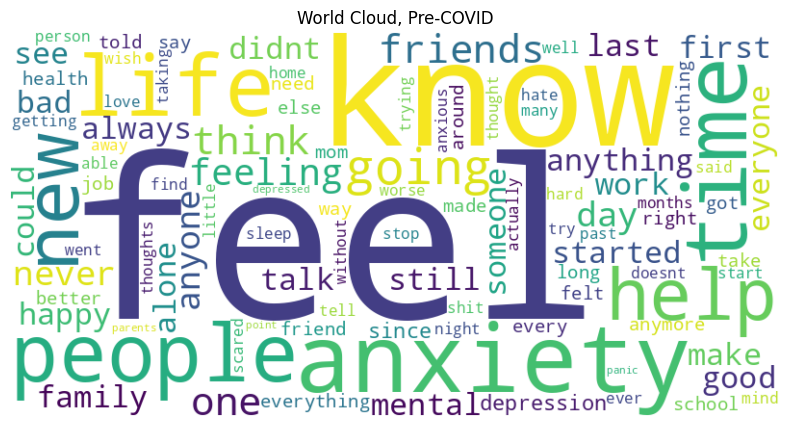

In [10]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pre_covid, interpolation="bilinear")
plt.title("World Cloud, Pre-COVID")
plt.axis("off")
plt.show()

## Pre-COVID Word Cloud

**The visualization shows**:

"feel" and "anxiety" are the dominant words (largest size)

"friends", "know", and "people" are prominent, suggesting social connection themes

Mental health terms: "mental," "depression," "panic" are visible

Social contexts: "family," "school," "work," "job"

Temporal words: "never," "always," "still," "anymore"


The pre-COVID discourse appears focused on emotional states ("feel," "feeling") and social relationships ("friends," "people," "family"), with anxiety as a central concern.


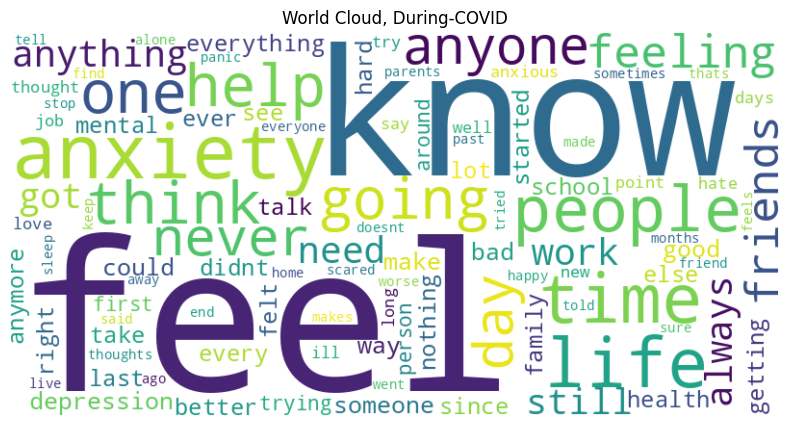

In [11]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_during_covid, interpolation="bilinear")
plt.title("World Cloud, During-COVID")
plt.axis("off")
plt.show()

## During-COVID Word Cloud

**Notable changes**:

"know" becomes much more prominent, suggesting uncertainty and information-seeking

"anyone" appears very large, indicating increased feelings of isolation and seeking validation

"feel" and "anxiety" remain dominant but are now surrounded by:

Time-related words: "day," "time," "still," "never"

Cognitive words: "think," "thought"

Existence/routine words: "life," "going," "getting"

"help" is very prominent, suggesting increased help-seeking behavior

"everything" and "anything" appear larger, indicating all-encompassing feelings


The during-COVID discourse shows a shift toward uncertainty ("know"), universality of experience ("anyone," "everyone"), and disruption of normal life patterns.


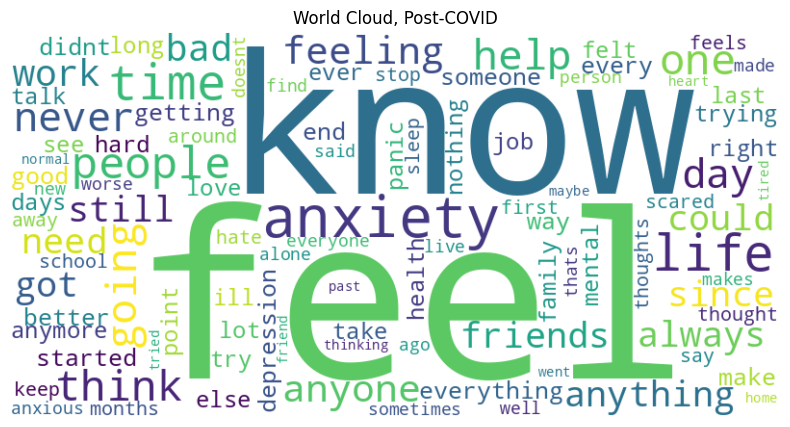

In [12]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_post_covid, interpolation="bilinear")
plt.title("World Cloud, Post-COVID")
plt.axis("off")
plt.show()

## Post-COVID Word Cloud

**The post-COVID cloud shows**:

"feel" and "know" remain the largest words

"anxiety" is still very prominent

"feeling" appears large, suggesting continued emotional processing

**Words suggesting persistence**: 

"still," "always," "never"

"help" remains prominent but slightly smaller than during COVID

Temporal words: "time," "day," "long" indicate ongoing struggles

"trying" appears, suggesting active coping efforts

Social words remain: "people," "friends," "anyone"


The post-COVID discourse suggests people are still processing emotional fallout, with language indicating both ongoing struggles ("still," "never") and active coping ("trying," "getting").


# Overall Interpretation Across All Three Analyses

## Comparing the three word clouds reveals**:

### Emotional continuity

"Feel" and "anxiety" dominate all three periods, confirming anxiety as a persistent mental health concern

### COVID amplification

The During-COVID cloud is visually denser and more chaotic, reflecting the volume and intensity increase

### Isolation language

"Anyone" and "everyone" become much more prominent during COVID, showing the pandemic's social isolation impact

### Cognitive shift

"Know" and "think" grow in prominence during/after COVID, suggesting more uncertainty and cognitive processing

### Persistent impact

The Post-COVID cloud resembles During-COVID more than Pre-COVID, confirming that mental health discourse hasn't returned to baseline

### Help-seeking behavior

"Help" is consistently prominent but peaks during COVID, indicating the pandemic drove people to actively seek support

The word frequency analysis complements your topic modeling by showing that while the core vocabulary remains similar, the intensity, context, and proportions shifted dramatically during COVID and haven't fully recovered.